# Assignment 1
## 机器学习与人工智能 (Machine Learning and Artificial Intelligence)

### <font color='red'>Due Date: October 17, 2021 11:59pm</font> 

Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file
- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Use "download as" in the "file" menu to convert your ipython file to a .html file
- Zip three files: .pdf, .ipynb, and .html files, and submit your zip to the Blackboard


This assignment covers Supervised Learning models. In this assignment, you are required to use two different clean datasets to train FOUR regression models for continous targets and THREE classification models for discrete targets.


The total score of the implementation part is: 70

In [1]:
NAME = "孟念" # / Niklas Muennighoff

## Data Exploration

In [2]:
# Packages
!pip install -q mglearn

In [3]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# This is the California housing dataset.
# The detailed description can be found in https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset
CAhousing = sklearn.datasets.fetch_california_housing()

#CAhousing['DESCR']

In [5]:
print('Features in the housing dataset: ', CAhousing['feature_names'])

Features in the housing dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
X = CAhousing.data
target = CAhousing.target

In [7]:
# convert the data into a pandas DataFrame, in case you might need to use in the following questions.

df_housing = pd.DataFrame(CAhousing.data,columns=CAhousing.feature_names)
df_housing['target'] = pd.Series(CAhousing.target)

In [66]:
# Explore the correlation plots among variables

# YOUR CODE HERE
df_housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Analysis:
 - Very high correlation between MedInc and the target value (This makes sense as the target is House Value & Higher Income people can afford more expensive houses)
 
- Also some correlation between average rooms & the target, however not so pronounced - possibly because few-room houses in the city still have a higher value than in the countryside

## Regression

In [10]:
# split the dataset into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42)


In [17]:
# Compare among regular linear regression models, polynomial, Ridege, and Lasso regression models. 
# Note that for each model, you have to search for the best model parameters.
# Comparison requirement: consider both the model performance and time efficiency.

# YOUR CODE HERE
import time

from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

algorithms = [Ridge, LinearRegression, Lasso, PolynomialRegression]

# Define search spaces
param_grids = [
  {'solver': ['svd', 'cholesky', 'lsqr', 'sag'], 'alpha': [1e-1, 1, 10], 'normalize': [True, False]}, # param_grid_ridge
  {'fit_intercept': [True, False], 'normalize': [True, False]}, # param_grid_lr
  {'alpha': [1e-1, 1, 10], 'fit_intercept': [True, False], 'normalize': [True, False]}, # param_grid_lasso
  {'polynomialfeatures__degree': [1, 2], 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}, # polynomial reg
]
 
for algo, param_grid in zip(algorithms, param_grids):

    print("Algorithm: ", algo.__name__)

    # Define model & run HP Search
    model = algo()
    search = GridSearchCV(model, param_grid)
    result = search.fit(X_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

    # Time Training
    if algo.__name__ == "PolynomialRegression":
        model = algo(**{k.split("__")[-1]:v for k,v in result.best_params_.items()})
    else:
        model = algo(**result.best_params_)

    x = time.time()
    model.fit(X_train, y_train)
    y = time.time()
    print(f"Took: {y-x} seconds to train")

    print("Score on Test Set:", model.score(X_test, y_test))
    print("R^2 on Test Set: ", sklearn.metrics.r2_score(model.predict(X_test), y_test))

    print(f"Took: {time.time()-y} seconds to predict")

    print("-"*50)
    print("\n"*2)

# Sources: sklearn documentation

Algorithm:  Ridge
Best Score: 0.607159939336843
Best Hyperparameters: {'alpha': 0.1, 'normalize': False, 'solver': 'cholesky'}
Took: 0.004378557205200195 seconds to train
Score on Test Set: 0.5910571915937861
R^2 on Test Set:  0.3441277029388694
Took: 0.0034112930297851562 seconds to predict
--------------------------------------------------



Algorithm:  LinearRegression
Best Score: 0.6071599686932017
Best Hyperparameters: {'fit_intercept': True, 'normalize': True}
Took: 0.005217790603637695 seconds to train
Score on Test Set: 0.5910509795491357
R^2 on Test Set:  0.3441351848714477
Took: 0.0038971900939941406 seconds to predict
--------------------------------------------------



Algorithm:  Lasso
Best Score: 0.5455176379613416
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': False}
Took: 0.014852285385131836 seconds to train
Score on Test Set: 0.5441677811607515
R^2 on Test Set:  -0.008884817552570201
Took: 0.00451970100402832 seconds to predict
------------

Analysis:
- LinearRegression & Ridge are the fastest algorithms, while Polynomial Regression is the slowest - This is because Polynomial regression just combines Polynomial Features with a LinearRegression algorithm, hence it must always be slower than LinearRegression; In addition the computation of Polynomial features can take some time
- LineaRegression has the best R^2 of all algorithms, though the differences asre tiny; This is likely because they are all Linear Regression algorithms; Using non-linear models and ensemble based models like RFRegression could significantly improve the performance

## Classification 

In [ ]:
selectN = 10000

(X, y) = sklearn.datasets.make_moons(n_samples=selectN, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

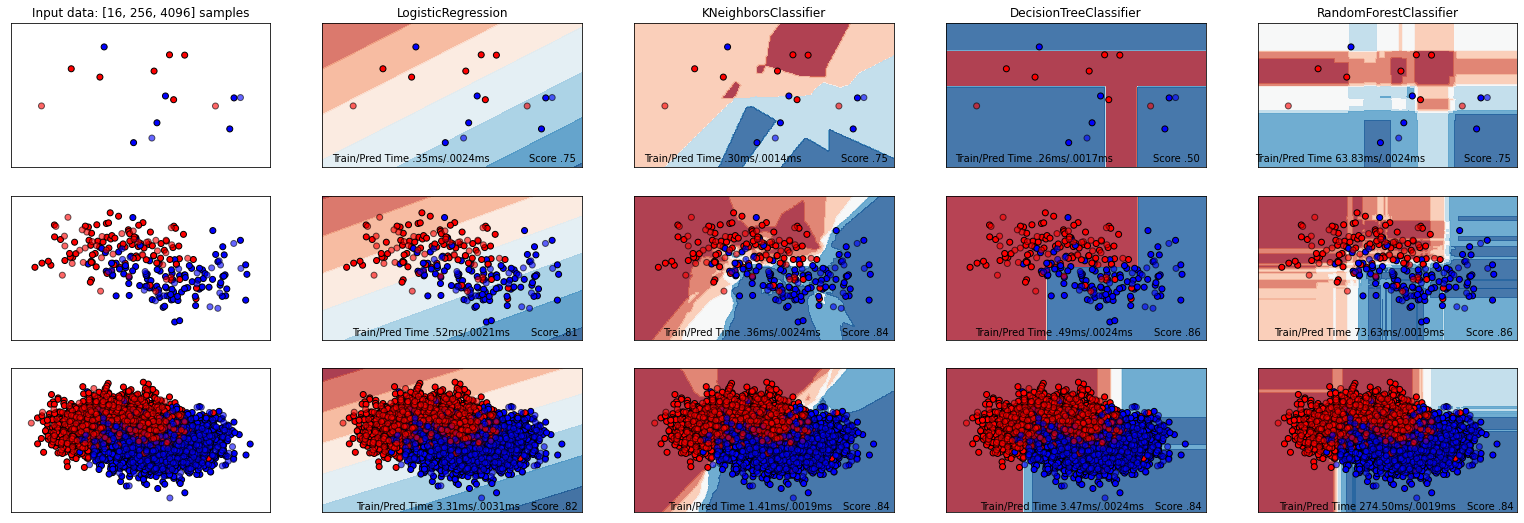

In [65]:
# Step 1: write a function (input argument is selectN) to compare different classification models 
# Alternative models: logistic regression, KNN, and Decision Trees
# The function should also include the model parameter selecting process
# Note: you have to consider both the model performance and time efficiency
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    LogisticRegression,
    KNeighborsClassifier,
    DecisionTreeClassifier,
    RandomForestClassifier,
]

param_grids = [
  {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear']}, # Logistic Regression
  {'n_neighbors' : [2, 3, 4, 5],'weights': ['uniform','distance']}, # KNN
  {'max_depth' : [2, 3, 4, 5, 6]}, # DT
  {'n_estimators' : [10, 50, 100], 'max_depth' : [5, 10]}, # RF
]


def compare_clf(X_train, X_test, y_train, y_test):
    models, scores, labels, train_times, pred_times = [], [], [], [], []

    for algo, grid in zip(classifiers, param_grids):
        model = algo()
        search = GridSearchCV(model, grid)
        result = search.fit(X_train, y_train)

        model = algo(**result.best_params_)

        x = time.time()
        model.fit(X_train, y_train)
        y = time.time()

        # Turn into ms
        train_times.append((y-x)*1000)
        pred_times.append((time.time()-y)*1000)

        models.append(model)
        scores.append(model.score(X_test, y_test))
        labels.append(f"{algo.__name__}")

    return models, scores, labels, train_times, pred_times


# Step 2: given different selectN, report how the sample sizes affect the model comparison results
# Visualize your comparison results

sample_sizes = [16**x for x in range(1,4)]
fig = plt.figure(figsize=(27, 9))

i = 1
for num, selectN in enumerate(sample_sizes):

    (X, y) = sklearn.datasets.make_moons(n_samples=selectN, noise=0.4)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Plotting
    ax = plt.subplot(len(sample_sizes), len(classifiers) + 1, i)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if num == 0:
        ax.set_title(f"Input data: {sample_sizes} samples")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Run comparison
    models, scores, labels, train_times, pred_times = compare_clf(X_train, X_test, y_train, y_test)
    for clf, score, label, train_time, pred_time in zip(models, scores, labels, train_times, pred_times):

        # Plot clfs
        ax = plt.subplot(len(sample_sizes), len(classifiers) + 1, i)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if num == 0:
            ax.set_title(label)
        ax.text(xx.max() - .1, yy.min() + .1, f"Score {('%.2f' % score).lstrip('0')}",
                size=10, horizontalalignment='right')
        ax.text(xx.max() - 1.5 , yy.min() + .1, f"Train/Pred Time {('%.2f' % train_time).lstrip('0')}ms/{('%.4f' % pred_time).lstrip('0')}ms",
                size=10, horizontalalignment='right')
        i += 1

# Sources: sklearn documentation, matplotlib documentation

Analysis:

- The RandomForestClassifier is always among the best ones
- Even though the Decision Tree is much worse than KNN / Logistic Regression for just 16 samples, the RandomForestClassifier manages to get the same performance as it ensembles multiple Decision Trees
- Therefore, however, the RFClassifier trains much slower than an individual decision tree (100x slower training for 4096 samples)
- As LogisticRegression is a linear algorithm it performs badly on the non-linear distribution the data has - The decision boundaries clearly show the problem - Using multiple layers with non-linearities (MLP) could overcome this
- KNeighbors has the fastest train and prediction time - This is because the algorithm gives the same class to close samples, which only requires few distance based computations

